# Imports
This section of code imports the required libraries for this linear regression model.

In [24]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Pre-process data
Firstly we want to preprocess the data. We do this by importing the CSV file containing the data. Then we clean the data. The first thing we do is ensure that the `Sale Amount`, `Assessed Value` and `List Year` columns all contain only numeric data. After this we filter the properties so that we only see entries that are residential and single family. After this we drop any rows in the `OPM remarks` column that contains the phrase "INCORRECT SALE AMOUNT" as it will cause incorrect data to be entered. Next we drop all rows in the `Sale Amount`, `Assessed Value` and `List Year` columns that contain a NaN value. Finally we filter the `Sale Amount` and `Assessed Value` columns so that we only see real estate that has a value between $100,000 and $419,300, as this filters the data to be within the median sale price of a house in America in 2023.

In [25]:
df = pd.read_csv('Real_Estate_Sales_2001-2022_GL.csv')

df['Sale Amount'] = pd.to_numeric(df['Sale Amount'], errors='coerce')
df['List Year'] = pd.to_numeric(df['List Year'], errors='coerce')
df['Assessed Value'] = pd.to_numeric(df['Assessed Value'], errors='coerce')

print(df['List Year'].min(), df['List Year'].max())
#df = df[df['Property Type'].str.contains("Residential", na=False)]
df = df[df['Residential Type'].str.contains("Single Family", na=False)]


df = df[~df['OPM remarks'].str.contains('INCORRECT SALE AMOUNT', na=False)]

df = df.dropna(subset=['Sale Amount', 'List Year', 'Assessed Value'])

print(df['List Year'].min(), df['List Year'].max())

df = df[(df['Sale Amount'] >= 100000) & (df['Assessed Value'] >= 100000)]
df = df[(df['Sale Amount'] <= 419300) & (df['Assessed Value'] <= 419300)]



/tmp/ipykernel_9695/1446425114.py:1: DtypeWarning: Columns (8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Real_Estate_Sales_2001-2022_GL.csv')


2001 2022
2001 2022


# Fit Data to Model


In [26]:
# 1. Predict future Sale Amount based on List Year
# Prepare data for predicting Sale Amount using List Year
X_year = df[['List Year']]  # Independent variable (List Year)
y_sale = df['Sale Amount']  # Dependent variable (Sale Amount)

# Initialize the model to predict Sale Amount
year_sale_model = LinearRegression()

# Fit the model
year_sale_model.fit(X_year, y_sale)

# 2. Predict Assessed Value based on Sale Amount
# Prepare data for predicting Assessed Value using Sale Amount
X_sale = df[['Sale Amount']]  # Independent variable (Sale Amount)
y_assessed = df['Assessed Value']  # Dependent variable (Assessed Value)

print(X_sale.max())
print(y_assessed.max())

# Initialize the model to predict Assessed Value
sale_assessed_model = LinearRegression()

# Fit the model
sale_assessed_model.fit(X_sale, y_assessed)

Sale Amount    419300.0
dtype: float64
419300.0


LinearRegression()

Predict stuff

In [27]:
# 3. Function to predict Sale Amount and Assessed Value for a given year
def predict_for_year(year):
    # Predict Sale Amount for the given year
    predicted_sale_amount = year_sale_model.predict([[year]])[0]

    # Predict Assessed Value based on the predicted Sale Amount
    predicted_assessed_value = sale_assessed_model.predict([[predicted_sale_amount]])[0]

    return predicted_sale_amount, predicted_assessed_value

# 4. Take user input for the year
year_input = 0  # Initializing year_input with an invalid value

# Loop until a valid year is entered (greater than 2022)
while year_input < 2022 or year_input > 2050:
    try:
        # Get user input and convert to integer
        year_input = int(input("Enter the year you want to predict sales for (2022 - 2050): "))
        
        # Check if the input year is valid
        if year_input < 2022:
            # Raise an IOError if the year is less than or equal to 2022
            raise IOError('Year must be greater than 2022')
        
        if year_input > 2050:
            # Raise an IOError if the year is less than or equal to 2022
            raise IOError('Year must 2050 or less')
    
    except IOError as e:
        # Print the error message and prompt the user to try again
        print(f"Error: {e}. Please try again.\n")
    
    except ValueError:
        # Handle the case where the input is not a valid integer
        print("Invalid input. Please enter a valid year.")

# Once a valid year is entered, proceed with the prediction
print(f"Valid year entered: {year_input}. Proceeding with predictions...")
# Call your prediction function here (e.g., predict_for_year(year_input))

# Predict Sale Amount and Assessed Value for the entered year
predicted_sale, predicted_assessed = predict_for_year(year_input)

# Print results
print(f"Predicted Sale Amount for {year_input}: ${predicted_sale:,.2f}")
print(f"Predicted Assessed Value for {year_input}: ${predicted_assessed:,.2f}")

Valid year entered: 2030. Proceeding with predictions...
Predicted Sale Amount for 2030: $251,827.71
Predicted Assessed Value for 2030: $166,935.80


/home/adamfitz395/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/adamfitz395/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


/home/adamfitz395/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


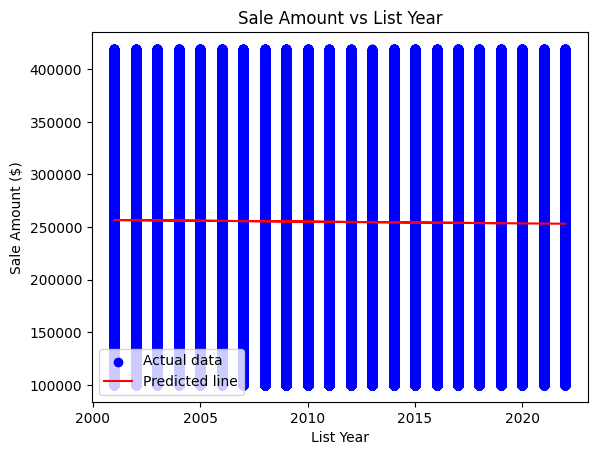

In [28]:
# Cell 6: Visualize Sale Amount vs List Year
plt.scatter(df['List Year'], df['Sale Amount'], color='blue', label='Actual data')
plt.plot(df['List Year'], year_sale_model.predict(X_year), color='red', label='Predicted line')
plt.title('Sale Amount vs List Year')
plt.xlabel('List Year')
plt.ylabel('Sale Amount ($)')
plt.legend()
plt.show()